In [ ]:
"""Copy of fcc_cat_dog.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1Tldp6JFfE1UAjckQ75mRX5Uq43Xsj0sU
"""

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Get project files
import urllib.request

url = "https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip"
filename = "cats_and_dogs.zip"
urllib.request.urlretrieve(url, filename)
print("Download complete.")

Download complete.


In [7]:
import zipfile

with zipfile.ZipFile("cats_and_dogs.zip", "r") as zip_ref:
    zip_ref.extractall("cats_and_dogs")
print("Extraction complete.")

Extraction complete.


In [12]:
PATH = 'cats_and_dogs/cats_and_dogs'

In [13]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

In [14]:
# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

In [15]:
# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [16]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

In [17]:
# Flow from directories
train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [18]:
val_data_gen = validation_image_generator.flow_from_directory(
    directory=validation_dir,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [39]:
# For test data, no labels
test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir,
    batch_size=1,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode=None,
    shuffle=False,
    classes=['test_images']
)

Found 50 images belonging to 1 classes.


In [40]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

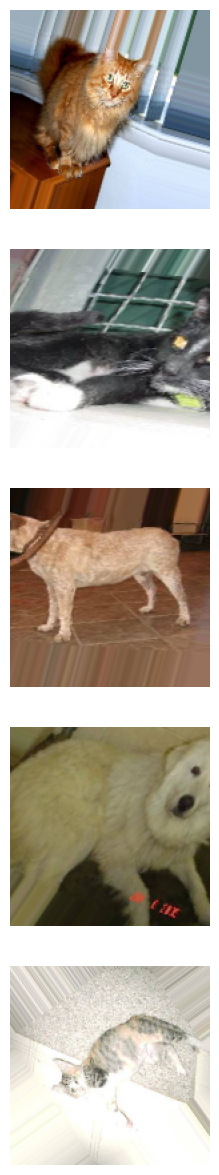

In [41]:
sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

In [42]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [43]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [44]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

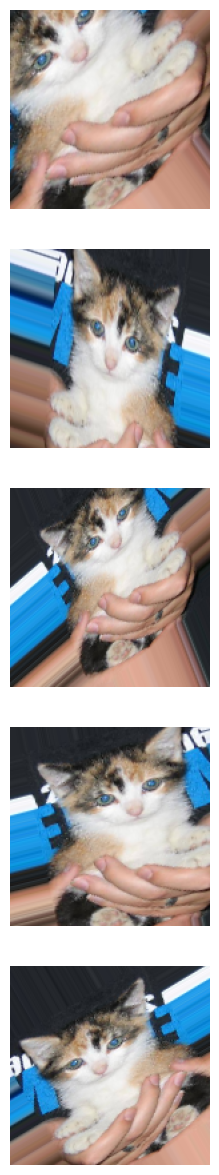

In [45]:
plotImages(augmented_images)

In [46]:
# 7
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\Users\chidi\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
# 8
EPOCHS = 15

In [48]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // batch_size
)

c:\Users\chidi\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.4653 - loss: 1.0338 - val_accuracy: 0.4967 - val_loss: 0.6910
Epoch 2/15
 1/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.4141 - loss: 0.6977

c:\Users\chidi\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 200ms/step - accuracy: 0.4141 - loss: 0.6977 - val_accuracy: 0.5234 - val_loss: 0.6905
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.5043 - loss: 0.6933 - val_accuracy: 0.5179 - val_loss: 0.6883
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - accuracy: 0.5234 - loss: 0.6914 - val_accuracy: 0.5190 - val_loss: 0.6877
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.5385 - loss: 0.6909 - val_accuracy: 0.5279 - val_loss: 0.6875
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - accuracy: 0.5469 - loss: 0.6828 - val_accuracy: 0.5469 - val_loss: 0.6855
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.5433 - loss: 0.6809 - val_accuracy: 0.6473 - val_loss: 0.6521
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - accuracy: 0.5938 - loss: 0.6654 - val_accuracy: 0.6060 - val_loss: 0.6604
Epoch 9/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.5823 - loss: 0.6701 - val_accuracy: 0.6529 - val_loss: 0.

In [49]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [50]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [51]:
epochs_range = range(len(acc))

Text(0.5, 1.0, 'Training and Validation Accuracy')

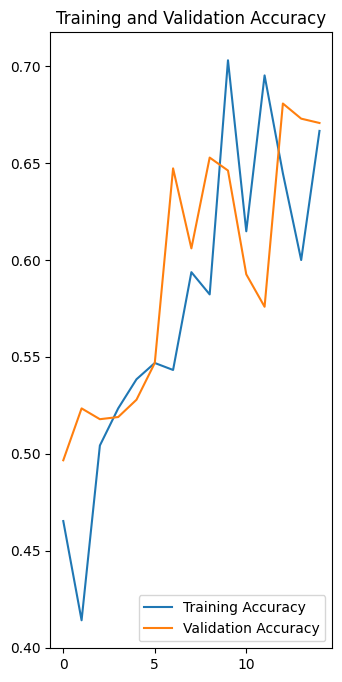

In [52]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

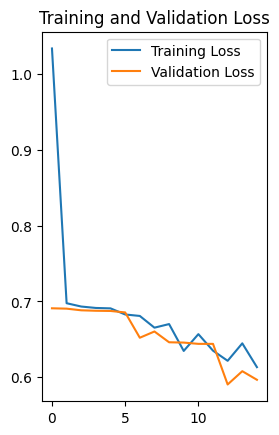

In [53]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
import os
test_images_dir = os.path.join(test_dir, 'test_images')
os.makedirs(test_images_dir, exist_ok=True)
for filename in os.listdir(test_dir):
    if filename.endswith(".jpg"):
        source = os.path.join(test_dir, filename)
        destination = os.path.join(test_images_dir, filename)
        os.rename(source, destination)

In [54]:
probabilities = model.predict(test_data_gen)

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [55]:
# Convert probabilities to integers (0 for cat, 1 for dog)
probabilities = [int(round(p[0])) for p in probabilities]

In [56]:
# Get the first 50 images from the test_data_gen
test_images = [test_data_gen[i][0] for i in range(len(probabilities))]

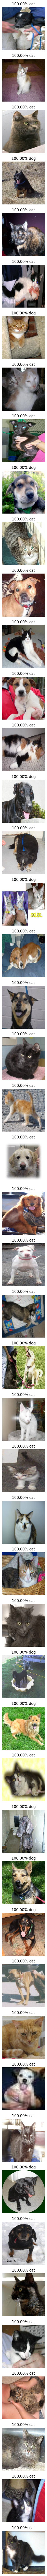

In [57]:
# Visualize the first 50 images
plotImages(test_images[:50], probabilities[:50])

In [58]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

In [59]:
correct = 0

In [61]:
for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

In [62]:
percentage_identified = (correct / len(answers)) * 100

In [63]:
passed_challenge = percentage_identified >= 63

In [64]:
print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

Your model correctly identified 136.0% of the images of cats and dogs.


In [65]:
if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

You passed the challenge!
